# AutoKeras

In [ ]:
import os
root_dir = '../../' if os.getcwd().split('/')[-1] != 'credit-now' else './'
os.chdir(root_dir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import credit_data
import visualkeras
import autokeras as ak

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
train_data, test_data, train_label, test_label = credit_data.load_data()

train_data = train_data.todense()
test_data = test_data.todense()
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 67) (6818, 67) (15906, 3) (6818, 3)


In [ ]:
clf = ak.StructuredDataClassifier()
clf.fit(train_data, train_label)

accuracy = clf.evaluate(test_data, test_label)
result = clf.predict(test_data)

print(accuracy)
print(result)

Trial 65 Complete [00h 02m 50s]
val_accuracy: 0.6347992420196533

Best val_accuracy So Far: 0.6513702869415283
Total elapsed time: 03h 46m 35s
INFO:tensorflow:Oracle triggered exit
498/498 [==============================] - 5s 7ms/step - loss: 1.0022 - accuracy: 0.6125
INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets
214/214 [==============================] - 1s 6ms/step
[0.8875452876091003, 0.6390436887741089]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


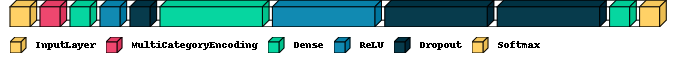

In [ ]:
visualkeras.layered_view(clf, legend=True)

In [ ]:
model = clf.export_model()
history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)
result = model.evaluate(test_data, test_label)

In [ ]:
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

loss (cross-entropy) : 0.8804722428321838
test accuracy : 0.6388970613479614


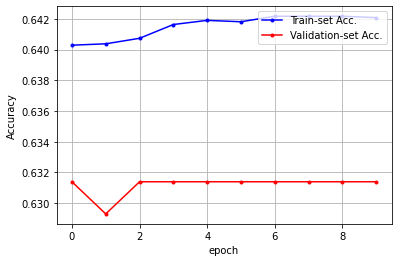

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
new_model = models.load_model('credit_data/model_autokeras.h5')

ValueError: Unknown layer: Custom>MultiCategoryEncoding. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.